In [16]:
!pip install scikit-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 209.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 178.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 243.8 MB/s eta 0:00:00


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
insurance_data = pd.read_csv("data/insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


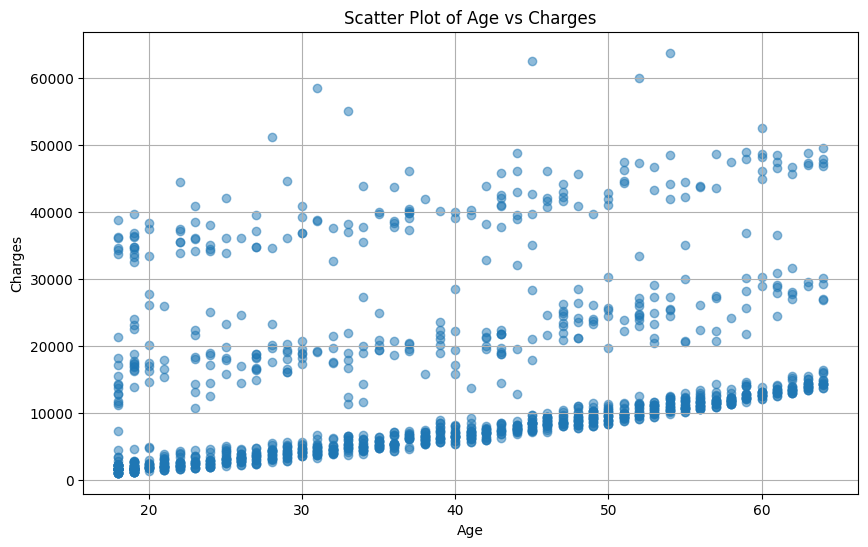

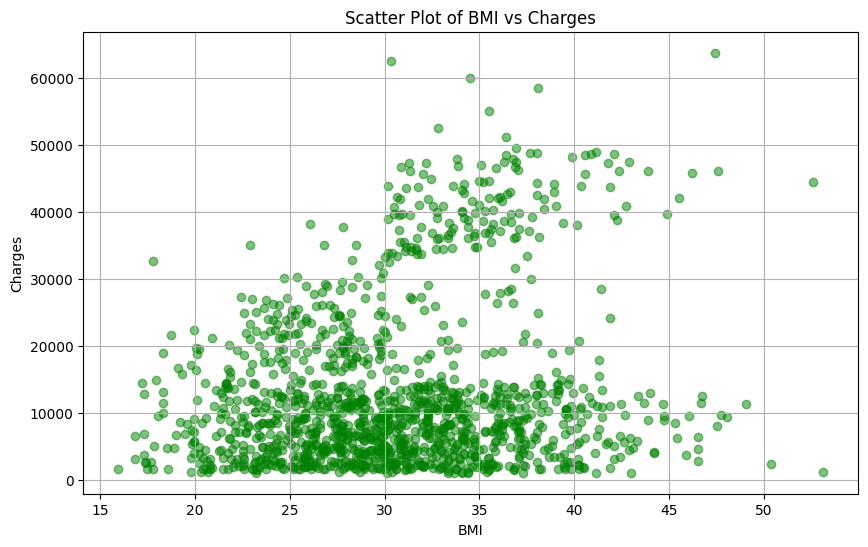

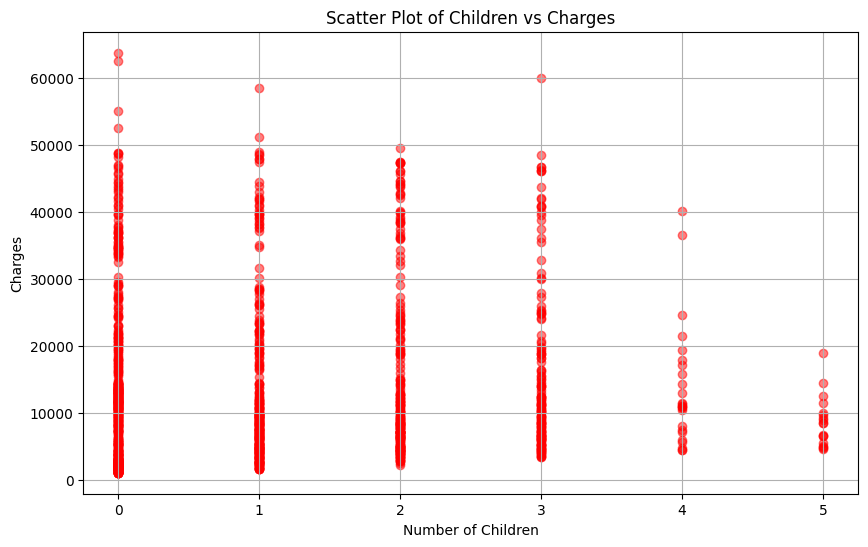

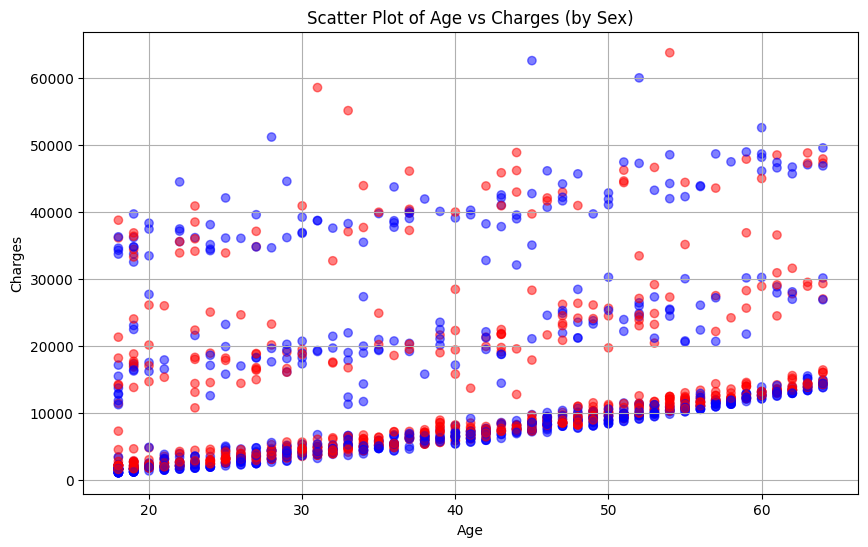

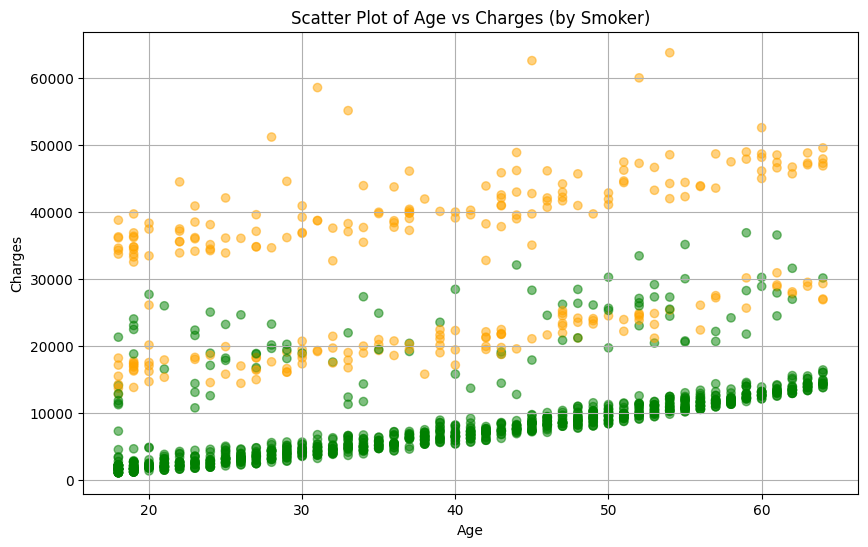

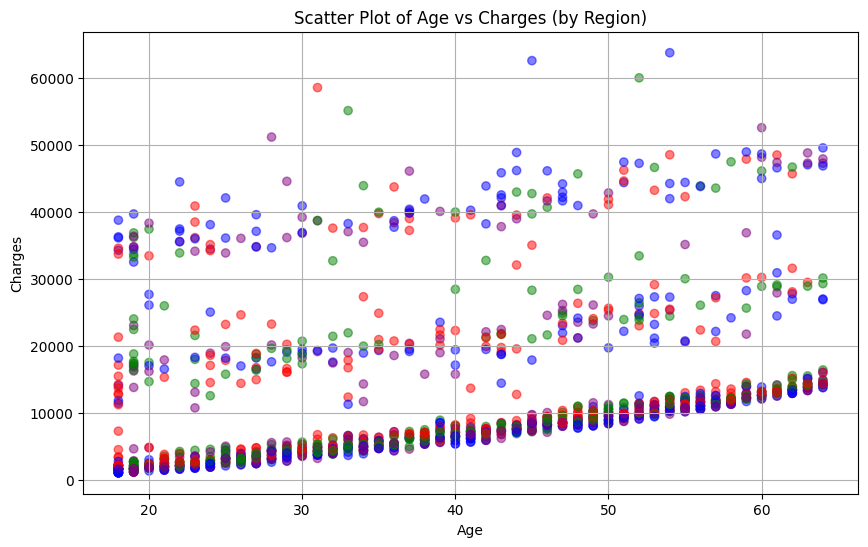

In [9]:
# 使用散点图来查看 'age' 和 'charges' 之间的关系
plt.figure(figsize=(10, 6))
plt.scatter(insurance_data['age'], insurance_data['charges'], alpha=0.5)
plt.title('Scatter Plot of Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# 使用散点图来查看 'bmi' 和 'charges' 之间的关系
plt.figure(figsize=(10, 6))
plt.scatter(insurance_data['bmi'], insurance_data['charges'], alpha=0.5, color='green')
plt.title('Scatter Plot of BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# 使用散点图来查看 'children' 和 'charges' 之间的关系
plt.figure(figsize=(10, 6))
plt.scatter(insurance_data['children'], insurance_data['charges'], alpha=0.5, color='red')
plt.title('Scatter Plot of Children vs Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# 绘制 sex vs charges 散点图
plt.figure(figsize=(10, 6))
colors = {'male': 'blue', 'female': 'red'}
plt.scatter(insurance_data['age'], insurance_data['charges'], c=insurance_data['sex'].apply(lambda x: colors[x]), alpha=0.5)
plt.title('Scatter Plot of Age vs Charges (by Sex)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# 绘制 smoker vs charges 散点图
plt.figure(figsize=(10, 6))
colors_smoker = {'yes': 'orange', 'no': 'green'}
plt.scatter(insurance_data['age'], insurance_data['charges'], c=insurance_data['smoker'].apply(lambda x: colors_smoker[x]), alpha=0.5)
plt.title('Scatter Plot of Age vs Charges (by Smoker)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# 绘制 region vs charges 散点图
plt.figure(figsize=(10, 6))
regions = {'southwest': 'purple', 'southeast': 'blue', 'northwest': 'green', 'northeast': 'red'}
plt.scatter(insurance_data['age'], insurance_data['charges'], c=insurance_data['region'].apply(lambda x: regions[x]), alpha=0.5)
plt.title('Scatter Plot of Age vs Charges (by Region)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

In [10]:
# 为所有的数值和分类变量分别计算与 'charges' 的皮尔森相关系数
# 分类变量需要先转换为数值型进行相关性计算

# 将分类变量转换为数值型
insurance_data_encoded = insurance_data.copy()
insurance_data_encoded['sex'] = insurance_data_encoded['sex'].map({'male': 1, 'female': 0})
insurance_data_encoded['smoker'] = insurance_data_encoded['smoker'].map({'yes': 1, 'no': 0})
insurance_data_encoded['region'] = insurance_data_encoded['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

# 计算与 'charges' 的皮尔森相关系数
pearson_correlation = insurance_data_encoded.corr()['charges'].sort_values(ascending=False)
pearson_correlation

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
Name: charges, dtype: float64

In [14]:
df = insurance_data[['smoker', 'age', 'bmi', 'charges']]
df

,smoker,age,bmi,charges
0,yes,19,27.900,16884.92400
1,no,18,33.770,1725.55230
2,no,28,33.000,4449.46200
3,no,33,22.705,21984.47061
4,no,32,28.880,3866.85520
...,...,...,...,...
1333,no,50,30.970,10600.54830
1334,no,18,31.920,2205.98080
1335,no,18,36.850,1629.83350
1336,no,21,25.800,2007.94500


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Convert the 'smoker' column to numerical values
le = LabelEncoder()
df['smoker'] = le.fit_transform(df['smoker'])  # 'yes' -> 1, 'no' -> 0
df

/tmp/ipykernel_2246/2782868564.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoker'] = le.fit_transform(df['smoker'])  # 'yes' -> 1, 'no' -> 0


,smoker,age,bmi,charges
0,1,19,27.900,16884.92400
1,0,18,33.770,1725.55230
2,0,28,33.000,4449.46200
3,0,33,22.705,21984.47061
4,0,32,28.880,3866.85520
...,...,...,...,...
1333,0,50,30.970,10600.54830
1334,0,18,31.920,2205.98080
1335,0,18,36.850,1629.83350
1336,0,21,25.800,2007.94500


In [40]:
from sklearn.preprocessing import StandardScaler

# Select features (X) and target (y)
X = df[['age', 'bmi', 'smoker']]
y = df['charges']

print(X)
print(y)

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization to the features
X_scaled = scaler.fit_transform(X)

print(X_scaled)

      age     bmi  smoker
0      19  27.900       1
1      18  33.770       0
2      28  33.000       0
3      33  22.705       0
4      32  28.880       0
...   ...     ...     ...
1333   50  30.970       0
1334   18  31.920       0
1335   18  36.850       0
1336   21  25.800       0
1337   61  29.070       1

[1338 rows x 3 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
[[-1.43876426 -0.45332     1.97058663]
 [-1.50996545  0.5096211  -0.5074631 ]
 [-0.79795355  0.38330685 -0.5074631 ]
 ...
 [-1.50996545  1.0148781  -0.5074631 ]
 [-1.29636188 -0.79781341 -0.5074631 ]
 [ 1.55168573 -0.26138796  1.97058663]]


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

# Display the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error (MSE): 34512843.88022789
Root Mean Squared Error (RMSE): 5874.763304187488
Mean Absolute Error (MAE): 4260.560091099393
Mean Absolute Percentage Error (MAPE): 49.57049147958807
R-squared: 0.7776932310583375
Adjusted R-squared: 0.7751670177749095
Coefficients: [3643.34084567 1990.01046478 9554.03418177]
Intercept: 13321.292969032465


In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Add a column of ones to the features for the intercept term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add intercept term
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]    # Add intercept term

# Calculate the coefficients using the normal equation: theta = (X_b.T * X_b)^(-1) * X_b.T * y
theta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# Make predictions on the test data
y_pred = X_test_b.dot(theta)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display the coefficients
print("Coefficients:", theta[1:])
print("Intercept:", theta[0])


Mean Squared Error: 34512843.8802279
R-squared: 0.7776932310583374
Coefficients: [3643.34084567 1990.01046478 9554.03418177]
Intercept: 13321.292969032467
